# First Baruch Volatility Workshop
<p>


## Session 1: The volatility surface: Statics and dynamics

<p>

Instructor: Jim Gatheral   
  
  
<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/07/BaruchLogo2.png" align = "left" width=160></h3>  


<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/07/MFElogo.png" align = "right" width=100></h3>




### Outline of Session 1

- Introduction to R and iPython notebook


- What is the volatility surface?


- Financial time series stylized facts 


- Stochastic volatility


- The Bergomi-Guyon expansion


- Term structure of at-the-money skew


- The skew-stickiness ratio


- The volatility envelope

$$
\newcommand{\bea}{\begin{eqnarray}}
\newcommand{\eea}{\end{eqnarray}}
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\cF}{\mathcal{F} }
\newcommand{\cV}{\mathcal{V} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\angl}[1]{\langle{#1}\rangle}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\bea}{\begin{eqnarray}}
\newcommand{\eea}{\end{eqnarray}}
\newcommand{\dsum}{\displaystyle\sum}
\newcommand{\sgn}{\mathrm{sign}}
\newcommand{\ee}[1]{{\mathbb{E}\left[{#1}\right]}}
\newcommand{\eef}[1]{{\mathbb{E}\left[\left.{#1}\right|\cF_t\right]}}
$$

### What is R? (http://cran.r-project.org)

From Wikipedia:

- In computing, R is a programming language and software environment for statistical computing and graphics. It is an implementation of the S programming language with lexical scoping semantics inspired by Scheme.


- R was created by Ross Ihaka and Robert Gentleman at the University of Auckland, New Zealand, and is now developed by the R Development Core Team. It is named partly after the first names of the first two R authors (Robert Gentleman and Ross Ihaka), and partly as a play on the name of S. The R language has become a de facto standard among statisticians for the development of statistical software.

- R is widely used for statistical software development and data analysis. R is part of the GNU project, and its source code is freely available under the GNU General Public License, and pre-compiled binary versions are provided for various operating systems. R uses a command line interface, though several graphical user interfaces are available.

### RStudio (http://www.rstudio.com)

From RStudio.org:

- RStudio is an integrated development environment (IDE) for R. RStudio combines an intuitive user interface with powerful coding tools to help you get the most out of R. 


- RStudio brings together everything you need to be productive with R in a single, customizable environment. Its intuitive interface and powerful coding tools help you get work done faster. 

- RStudio is available for all major platforms including Windows, Mac OS X, and Linux. It can even run alongside R on a server, enabling multiple users to access the RStudio IDE using a web browser. 


- Like R, RStudio is available under a free software license that guarantees the freedom to share and change the software, and to make sure it remains free software for all its users.

###The IPython Notebook (http://ipython.org/notebook.html)

From ipython.org:

The IPython Notebook is a web-based interactive computational environment where you can combine code execution, text, mathematics, plots and rich media into a single document:

The IPython notebook with embedded text, code, math and figures.  These notebooks are normal files that can be shared with colleagues, converted to other formats such as HTML or PDF, etc. You can share any publicly available notebook by using the IPython Notebook Viewer service which will render it as a static web page. This makes it easy to give your colleagues a document they can read immediately without having to install anything.



http://nbviewer.ipython.org/github/dboyliao/cookbook-code/blob/master/notebooks/chapter07_stats/08_r.ipynb has instructions on using R with iPython notebook.

### Set up R environment

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R

download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/04/VW1.zip", destfile="VW1.zip")
unzip(zipfile="VW1.zip")


trying URL 'http://mfe.baruch.cuny.edu/wp-content/uploads/2015/04/VW1.zip'
Content type 'application/zip' length 92874 bytes (90 KB)
opened URL
downloaded 90 KB



###The Black-Scholes formula

Code from BlackScholes.R:

In [3]:
%%R

BSFormula <- function(S0, K, T, r, sigma)
{
    x <- log(S0/K)+r*T
    sig <- sigma*sqrt(T)
    d1 <- x/sig+sig/2
    d2 <- d1 - sig
    pv <- exp(-r*T)
    return( S0*pnorm(d1) - pv*K*pnorm(d2))
}

Note that this function can take a vector of strikes and volatilities.

In [4]:
%%R

BSFormula(S0=1, K=c(.9,1.0,1.1), T=1, r=0, sigma=0.2)



[1] 0.13589108 0.07965567 0.04292011


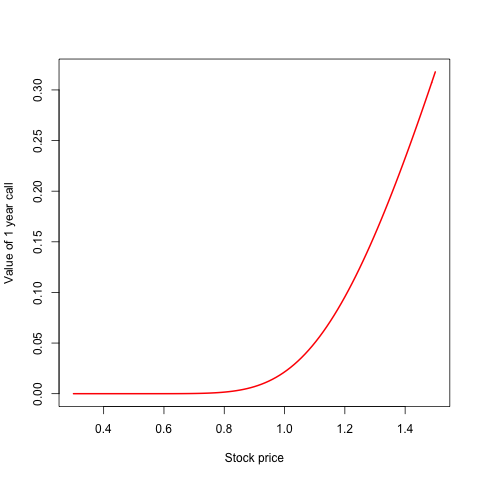

In [5]:
%%R

curve(BSFormula(S0=x, K=1.2, T=1, r=0, sigma=0.2),from=0.3,to=1.5,col="red",lwd=2,xlab="Stock price",ylab="Value of 1 year call")

###Implied volatility

In what follows, we always assume zero rates and dividends.

Denote the market price of an option with log-strike $k$ and expiration $t$ by $C(k,t)$.  Then the implied volatility $\sigma_{BS}(k,t)$ is the number that solves:

$$
C_{BS}\left(k,t,\sigma_{BS}(k,t)\right)=C(k,t)
$$

where $C_{BS}\left(\cdot\right)$ denotes the Black-Scholes formula for a call option:

$$
C_{BS}\left(k,t,\sigma\right)=F\,N(d_+)-K\,N(d_-)=F\,\left\{N(d_+)-e^k\,N(d_-)\right\}
$$


$$
\text{with }\quad\quad d_\pm=\frac{-k}{\sigma\,\sqrt{t}} \pm \frac{\sigma\,\sqrt{t}}{2}.
$$



Here is some more code from BlackScholes.R

In [6]:
%%R

BSImpliedVolCall <- function(S0, K, T, r, C)
{
    nK <- length(K)
    sigmaL <- rep(1e-10,nK)
    CL <- BSFormula(S0, K, T, r, sigmaL)
    sigmaH <- rep(10,nK)
    CH <- BSFormula(S0, K, T, r, sigmaH)
    while (mean(sigmaH - sigmaL) > 1e-10)
      {
        sigma <- (sigmaL + sigmaH)/2
        CM <- BSFormula(S0, K, T, r, sigma)
        CL <- CL + (CM < C)*(CM-CL)
        sigmaL <- sigmaL + (CM < C)*(sigma-sigmaL)
        CH <- CH + (CM >= C)*(CM-CH)
        sigmaH <- sigmaH + (CM >= C)*(sigma-sigmaH)
      }
    return(sigma)
}



First, we generate some option prices:

In [7]:
%%R

vols <- c(0.23,0.20,0.18)
K <- c(0.9,1.0,1.1)
(optVals <- BSFormula(S0=1,K,T=1,r=0,sigma=vols))

[1] 0.14589696 0.07965567 0.03557678


Now get implied volatilities from these option prices: 

In [8]:
%%R

(impVols <- BSImpliedVolCall(S0=1, K, T=1, r=0, C=optVals))

[1] 0.23 0.20 0.18


### The volatility surface

In practice, implied volatility depends on strike and expiration.


- Fixing one expiration, the *volatility smile* is the graph of implied volatility as a function of (log-)strike.


- Plotting implied volatility by strike and expiration gives the *volatility surface*.

### Smiles as of 15-Sep-2005

We see that the graph of implied volatility vs log-strike looks like a skewed smile.  Some people say "smirk".

<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/07/spxVols050915.png" align = "left" width=900></h3> 

Figure 1: SPX volatility smiles as of September 15, 2005.

### 3D plot

Interpolating by time to expiration, we obtain the following picture of the SPX volatility surface as of the close on September 15, 2005:

<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/07/SA2009plot3D.png" align = "left" width=900></h3> 

Figure 2: Figure 3.2 from *The Volatility Surface*.  $k:=\log{K/F}$ is the log-strike and $t$ is time to expiry.

### Why is the surface not flat?

Suppose
$$
\frac{dS}{S}=\sigma\,dZ
$$
with constant $\sigma$.  The solution to this SDE is ($Z \sim N(0,1)$)

$$
S_t = S_0\,e^{\sigma\,\sqrt{t} \,Z-\sigma^2\,t/2}.
$$


$S_t$ is then lognormally distributed and implied volatility, independent of strike or time to expiration.
- If $\sigma$ were constant, the implied volatility surface would be flat.

In the real world, returns are not lognormal nor are they independent, as we will now see.

### Financial time series: stylized facts

From Cont (2001)<sup id="cite_ref-Cont2001" class="reference"><a href="#cite_note-Cont2001"><span>[</span>4<span>]</span></a></sup>:

>the seemingly 
random variations of asset prices do share some quite non-trivial statistical properties. Such properties, common across 
a wide range of instruments, markets and time periods are 
called *stylized empirical facts*.

Cont (2001)<sup id="cite_ref-Cont2001" class="reference"><a href="#cite_note-Cont2001"><span>[</span>4<span>]</span></a></sup> lists the following stylized facts

- **Absence of autocorrelation**: (linear) autocorrelations 
of asset returns are often insigniﬁcant, except for very 
small intraday time scales.



- **Heavy tails**: the (unconditional) distribution of returns 
seems to display a power-law or Pareto-like tail, with 
a tail index which is finite, higher than two and less 
than five for most data sets studied. In particular this 
excludes stable laws with infinite variance and the normal 
distribution.

- **Gain/loss asymmetry**: one observes large drawdowns in 
stock prices and stock index values but not equally large 
upward movements. 


- **Aggregational Gaussianity**: as one increases the 
time scale $\Delta t$ over which returns are calculated, 
their distribution looks more and more like a normal 
distribution. In particular, the shape of the distribution 
is not the same at different time scales. 

- **Intermittency**: returns display, at any time scale, a high 
degree of variability. This is quantiﬁed by the presence of 
irregular bursts in time series of a wide variety of volatility 
estimators. 


- **Volatility clustering**:
different measures of volatility 
display a positive autocorrelation over several days, which 
quantiﬁes the fact that high-volatility events tend to cluster 
in time. 

- **Conditional heavy tails**: 
even after correcting returns for 
volatility clustering (e.g. via GARCH-type models), the 
residual time series still exhibit heavy tails. However, the 
tails are less heavy than in the unconditional distribution 
of returns. 


- **Slow decay of autocorrelation in absolute returns**:
 the 
autocorrelation function of absolute returns decays slowly 
as a function of the time lag, roughly as a power law with 
an exponent $\beta \in [0.2, 0.4]$. This is sometimes interpreted 
as a sign of long-range dependence. 

-  **Leverage effect**: 
most measures of volatility of an asset are negatively correlated with the returns of that asset.


- **Volatility/volume correlation**: trading volume is 
correlated with all measures of volatility. 


- **Asymmetry in time scales**:
coarse-grained measures of 
volatility predict fine-scale volatility better than the other 
way round. 

###Power laws in daily SPX returns

Using R and the quantmod package, we analyze log-returns of SPX since 1950.

In [9]:
%%R

library(quantmod)
library(boot)

options("getSymbols.warning4.0"=FALSE)

getSymbols("^GSPC",from="1927-01-01") #Creates the time series object GSPC

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.
[1] "GSPC"


Do the same for VIX and create joint dataset of VIX and SPX

In [10]:
%%R
getSymbols("^VIX",from="1927-01-01") #Creates the time series object VIX

mm <- specifyModel(Cl(GSPC)~Cl(VIX))
spxVixData <-modelData(mm) #quantmod function automatically aligns data from two series

vix <- spxVixData[,"Cl.VIX"]
spx <- spxVixData[,"Cl.GSPC"]


print(head(spxVixData))

print(tail(spxVixData))

           Cl.GSPC Cl.VIX
1990-01-02  359.69  17.24
1990-01-03  358.76  18.19
1990-01-04  355.67  19.22
1990-01-05  352.20  20.11
1990-01-08  353.79  20.26
1990-01-09  349.62  22.20
           Cl.GSPC Cl.VIX
2015-05-22 2126.06  12.13
2015-05-26 2104.20  14.06
2015-05-27 2123.48  13.27
2015-05-28 2120.79  13.31
2015-05-29 2107.39  13.84
2015-06-01 2111.73  13.97


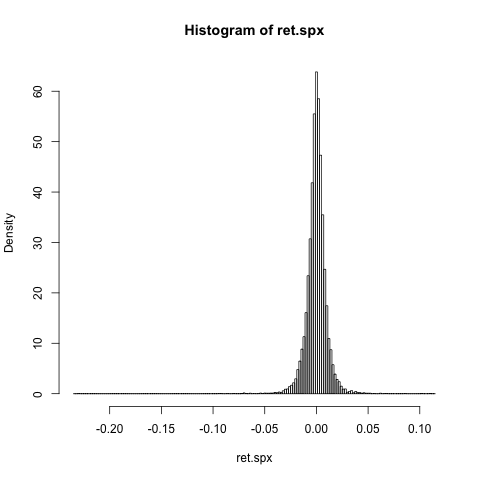

In [11]:
%%R

ret.spx <- log(Cl(GSPC)/lag(Cl(GSPC)))
ret.spx <- ret.spx[!is.na(ret.spx)]  # Remove missing values
ret.spx <- ret.spx-mean(ret.spx)
breaks <- seq(-.235,.115,.002)
hist.spx <- hist(ret.spx,breaks=breaks,freq=F)

Figure 3: Histogram of SPX log returns.  It doesn't look like a normal distribution!

###The Student-t distribution

$$
p(x) =\frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\sqrt{\nu\,\pi}\,\Gamma\left(\frac{\nu}{2}\right)}\,\frac{1}{\left(1+\frac{x^2}{\nu}\right)^{\frac{\nu+1}{2}}}\sim \frac{1}{x^{\nu+1}}\text{ as }x\to \infty
$$

So the tail-exponent $\zeta=\nu$, the degrees of freedom.

Obviously, this distribution has mean zero.  Its variance is

$$
\int x^2\,p(x)\,dx=\frac{\nu}{\nu-2}
$$

With $\nu=3$, the density simplifies to

$$
p(x) =\frac{2}{\sqrt{3}\,\pi}\,\frac{1}{\left(1+\frac{x^2}{3}\right)^2}
$$

###SPX daily log-returns: Student-t fit

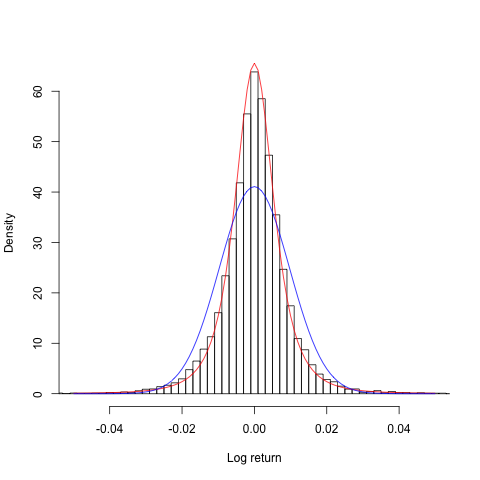

In [12]:
%%R

plot(hist.spx,xlim=c(-.05,.05),freq=F,main=NA,xlab="Log return") 
sig <- as.numeric(sd(ret.spx)) 
curve(dt(x*sqrt(3)/sig,df=3)*sqrt(3)/sig,from=-.05,to=.05,col="red", add=T)
curve(dnorm(x,mean=0,sd=sig),from=-.05,to=.05,col="blue", add=T)

Figure 4: Student-t with $\nu=3$ fits almost perfectly!  Normal fit is in blue.  The cubic law of returns is confirmed.

###SPX weekly log-returns

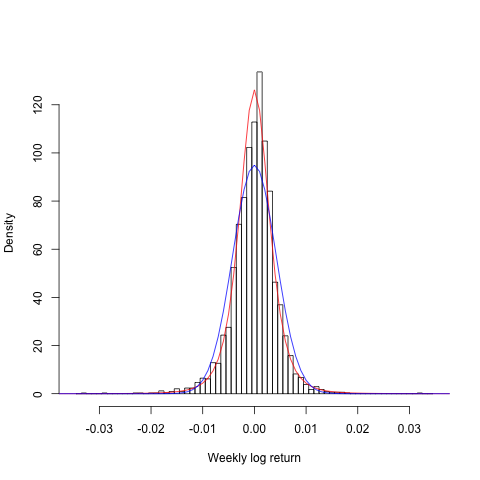

In [13]:
%%R

pxw <- Cl(to.weekly(GSPC))  # Built-in quantmod function to get close
retw <- Delt(log(pxw))[-1] 
retw <- retw-mean(retw) 
c(min(retw),max(retw))
breaks <- seq(-.0345,.0345,.001)
spx.histw <- hist(retw,breaks=breaks,freq=F,plot=F) 
sigw <- as.numeric(sd(retw)) 
scale <- function(nu){sqrt(nu/(nu-2))} 

plot(spx.histw,xlim=c(-.035,.035),freq=F,main=NA,xlab="Weekly log return") 
curve(dt(x*scale(4)/sigw,df=4)*scale(4)/sigw,from=-.05,to=.05,col="red", add=T)
curve(dnorm(x,mean=0,sd=sigw),from=-.05,to=.05,col="blue", add=T) 

Figure 5: Student-t with $\nu=4$ in red. Normal fit is in blue.  Aggregational Gaussianity?

###SPX monthly log-returns

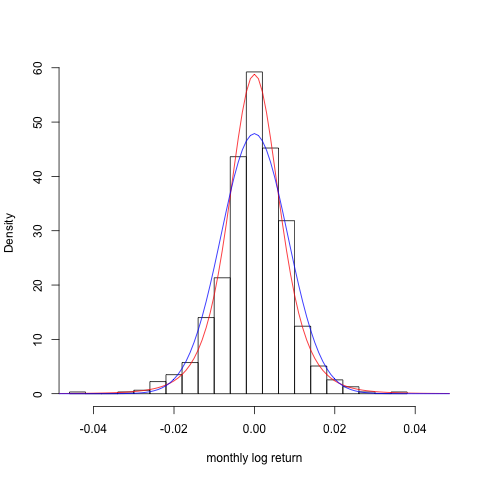

In [14]:
%%R

pxm <- Cl(to.monthly(GSPC))  # Built-in quantmod function to get close
retm <- Delt(log(pxm))[-1] 
retm <- retm-mean(retm) 
c(min(retm),max(retm))
breaks <- seq(-.046,.038,.004)
spx.histm <- hist(retm,breaks=breaks,freq=F,plot=F) 
sigm <- as.numeric(sd(retm)) 
scale <- function(nu){sqrt(nu/(nu-2))} 

plot(spx.histm,xlim=c(-.045,.045),freq=F,main=NA,xlab="monthly log return") 
curve(dt(x*scale(5)/sigm,df=5)*scale(5)/sigm,from=-.05,to=.05,col="red", add=T)
curve(dnorm(x,mean=0,sd=sigm),from=-.05,to=.05,col="blue", add=T) 

Figure 6: Student-t with $\nu=5$ in red. Normal fit is in blue.  Aggregational Gaussianity again?

##SPX log-returns: Volatility clustering

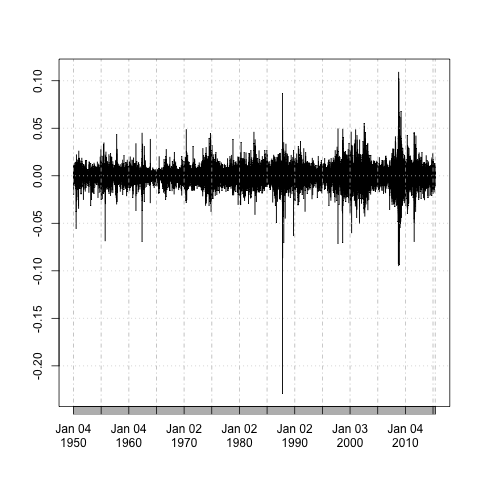

In [15]:
%%R

plot(ret.spx,main=NA)

Figure 7: Daily log-returns of SPX

###Autocorrelation of SPX returns

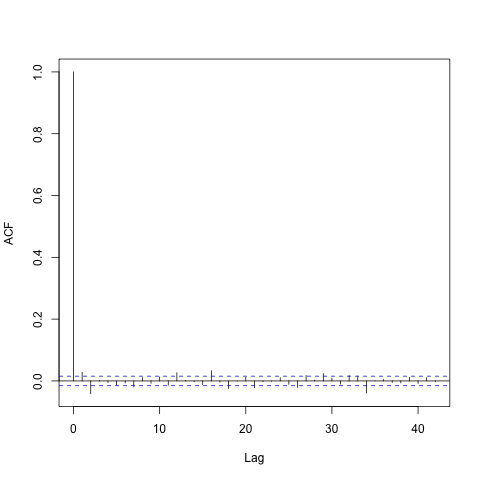

In [16]:
%%R

acf.r <- acf(ret.spx,main=NA)

Figure 8: No significant autocorrelation in returns.

### Autocorrelation of SPX absolute returns

It is a stylized fact that the autocorrelation function (ACF) of absolute log-returns decays as a power-law. However, we will see below that this widespread belief is probably not justified.


Call:
lm(formula = logacf.rabs[-(1:15)] ~ loglag.rabs[-(1:15)])

Coefficients:
         (Intercept)  loglag.rabs[-(1:15)]  
             -0.7497               -0.2912  



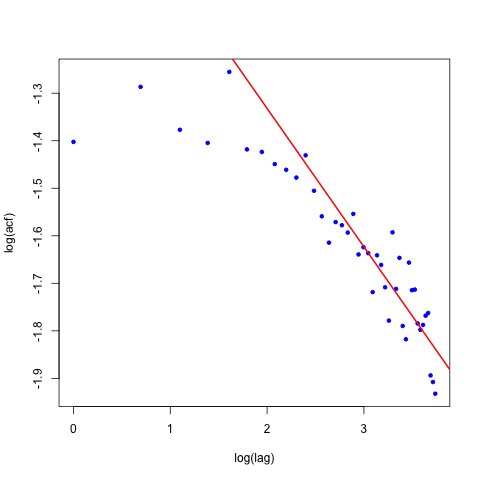

In [17]:
%%R
# Autocorrelation of absolute returns
acf.rabs <- acf(abs(ret.spx),main=NA,plot=F)
logacf.rabs <- log(acf.rabs$acf)[-1]  
loglag.rabs <- log(acf.rabs$lag)[-1] 
plot(loglag.rabs,logacf.rabs,xlab="log(lag)",ylab="log(acf)",pch=20,col="blue") 
print(acfrabs.lm <- lm(logacf.rabs[-(1:15)]~loglag.rabs[-(1:15)]) )
abline(acfrabs.lm,col="red",lwd=2) 

Figure 9: Slope of fit is around $-0.29$.  

- It is often concluded from fits like this that the autocorrelation function of volatility decays roughly as $t^{-\alpha}$ with $\alpha \approx 0.3$.

### Absolute and squared log-returns vs realized variance

Absolute daily log-returns are (very) noisy proxies for daily volatilities $\sigma_t$ and squared daily log-returns are (very) noisy proxies for daily variances $\sigma_t^2$.  Gatheral and Oomen <sup id="cite_ref-GO" class="reference"><a href="#cite_note-GO"><span>[</span>6<span>]</span></a></sup> (for example) show how tick data can be used to obtain more accurate estimates of realized variance $\sigma_r^2$.

The Oxford-Man Institute of Quantitative Finance makes historical realized variance estimates for 21 different stock indices freely available at http://realized.oxford-man.ox.ac.uk.  These estimates are updated daily. We may then investigate the time series properties of $\sigma_t^2$ empirically.


### Decay of the volatility ACF

According to our recent work using such realized variance time series, which I will present in Lecture 3, the empirical ACF of volatility does not decay as a power-law.

In fact, SPX realized variance has the following amazingly simple scaling property:

$$
m(q,\Delta) := \angl{|\log \sigma_{t+\Delta}-\log \sigma_t|^q}
=A\, \Delta^{q\,H} 
$$

where $\angl{\cdot}$ denotes a sample average.  

This simple scaling property holds for all 21 indices in the Oxford-Man dataset.  We have also checked that it holds for crude oil, gold and Bund futures.  For SPX over 14 years, $H \approx 0.14$ and $A \approx 0.38$.

As a consequence it may be shown that the autocorrelation function should take the form:

<a name="eq:ACF"></a>(1)
$$
\rho(\Delta)\sim e^{- \frac12\,\nu^2\,\Delta^{2\,H}}.
$$


### Predicted vs empirical autocorrelation function

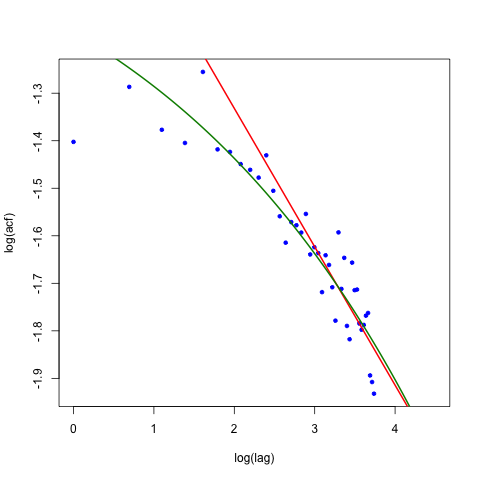

In [18]:
%%R

h.spx <- 0.14

y <- logacf.rabs
x <- acf.rabs$lag[-1]^(2*h.spx)

fit.lm <- lm(y[-1]~x[-1])
a <- fit.lm$coef[1]
b <- fit.lm$coef[2]

plot(loglag.rabs,logacf.rabs,xlab="log(lag)",ylab="log(acf)",pch=20,col="blue",xlim=c(0,4.5)) 
abline(acfrabs.lm,col="red",lwd=2) 
curve(a+b*exp(x*2*h.spx),from=0,to=4.5,add=T,col="green4",lwd=2)



Figure 10: The red line is the conventional linear fit; the green line is the rough volatilty prediction [(1)](#eq:ACF) .

### Log returns of VIX

VIX can be thought of as a measure of volatility smoothed over one month. Let's look at the distribution of VIX log-returns.

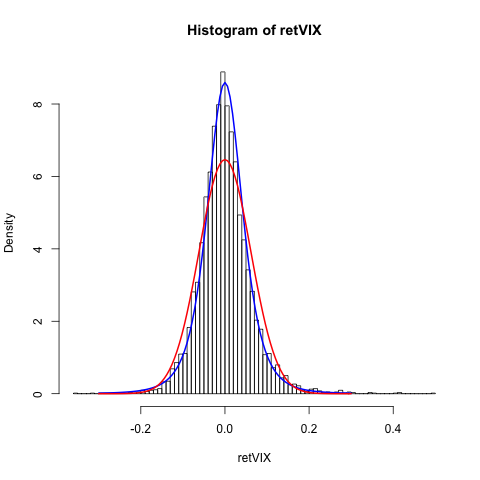

In [19]:
%%R

vix <- spxVixData[,"Cl.VIX"]
spx <- spxVixData[,"Cl.GSPC"]

retVIX <- as.numeric(diff(log(vix))[-1])
retSPX <- as.numeric(diff(log(spx))[-1])

sdVIX <- as.numeric(sd(retVIX)) 

hist(retVIX,breaks = 100,freq=F)
scale <- function(nu){sqrt(nu/(nu-2))} 
curve(dt(x*scale(4)/sdVIX,df=4)*scale(4)/sdVIX,from=-.3,to=.3,col="blue",lwd=2, add=T)
curve(dnorm(x,mean=0,sd=sdVIX),from=-.3,to=.3,col="red", lwd=2,add=T) 

Figure 11: Log-returns of VIX are somewhat less fat-tailed than log-returns of SPX.

### VIX vs SPX

We now regress log-returns of VIX against log-returns of SPX.

[1] -0.7105517


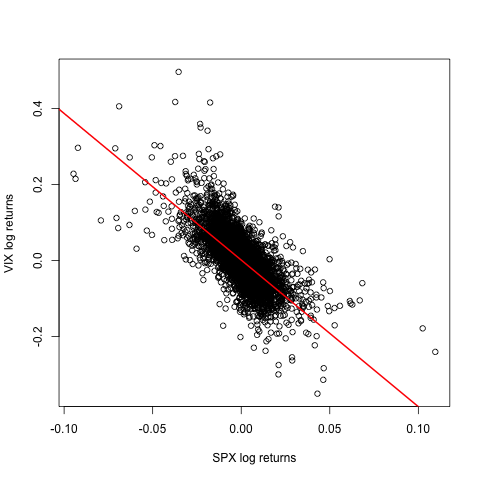

In [20]:
%%R

fit.spxvix <- lm(retVIX~retSPX)
fit.spxvix2 <- lm(retSPX~retVIX)

# Scatter plot + fit
plot(retSPX,retVIX,xlab="SPX log returns",ylab="VIX log returns");
abline(fit.spxvix,col="red",lwd=2);

print(cor(retVIX,retSPX)) # Gets correlation

Figure 12: Regression of VIX log-returns vs SPX log-returns.

- Note the negative correlation $\approx -0.7$ - similar to the correlation implied from fits of stochastic volatility models to option prices.

###Stochastic volatility

- In the stochastic volatility paradigm, the above stylized facts may be qualitatively reproduced by modeling volatility as a continuous stochastic process.

- Formally,
$$
\frac{dS_t}{S_t}=\sigma_t\,dZ_t
$$
with stochastic $\sigma_t$.


- Variance moves should be negatively autocorrelated and (anti-)correlated with index moves.

###Stochastic volatility examples

<br>

<blockquote><div style="background-color:#add8e6; color:#FFFFFF; font-style: normal;  " ><h4>
The Heston model</h4>
</div>
<div style="background-color:#E8E8E8; color:#000000; font-style: normal; ">
<br>

$$
\begin{eqnarray*}
\frac{dS_t}{S_t}&=&\sqrt{v_t}\,dZ_t\\
dv_t&=&-\kappa\,(v_t -\bar v)\,dt+\eta\,\sqrt{v_t}\,dW_t
\end{eqnarray*}
$$

with $\langle dZ_t\,dW_t\rangle= \rho\,dt$.

<br>

</div>

</blockquote>

<br>

<blockquote><div style="background-color:#add8e6; color:#FFFFFF; font-style: normal;  " ><h4>
The SABR model (with $\beta=1$)</h4>
</div>
<div style="background-color:#E8E8E8; color:#000000; font-style: normal; ">
<br>

$$
\begin{eqnarray*}
{dS_t}&=&\sigma_t\,S_t^\beta\,dZ_t\\
{d\sigma_t}&=&\alpha\,{\sigma_t}\,dW_t
\end{eqnarray*}
$$

with $\langle dZ_t\,dW_t\rangle= \rho\,dt$.

<br>

</div>

</blockquote>

- The Heston model is popular because there is a (complicated) closed-form expression for the characteristic function.  It is therefore easy and fast to price European options.  It follows that calibration to the market is fast.


- The SABR model is popular because there is a closed-form accurate asymptotic approximation to implied volatility.  Again, calibration is easy.

### Variance curve models

Let $x_t = \log S_t/F$ denote log-moneyness.  If $v_t = \sigma_t^2$ is instantaneous variance, the forward variance curve is given by

$$
\xi_t(u) = \eef{v_u}.
$$

- Forward variances are conditional expectations and thus martingales in $t$.


- Forward variance swaps are effectively tradable in practice as variance swap spreads.


- Forward variances are thus natural fundamental objects to consider for volatility modeling.

Bergomi and Guyon consider models written in the following variance curve form:

$$
\beas
dx_t &=& -\frac 12 \,\xi_t(t)\,dt+\sqrt{\xi_t(t)}\,dZ_t^1\\
d\xi_t(u) &=& \lambda(t,u,\xi_t).dZ_t,\quad \xi_0(u)=\xi(u).
\eeas
$$

Here, the instantaneous forward variance curve at time $t$ is represented by

$$
\xi_t := \left\{\xi_t(u): \,u \geq t \right\}
$$

and $Z=\left\{Z_1,...,Z_d\right\}$ is a $d-$dimensional Brownian motion.

Obviously, $\xi_t(t) = v_t$.

###The Bergomi and Guyon expansion

Using a technique from quantum mechanics, <span>[Bergomi and Guyon]<sup id="cite_ref-BG" class="reference"><a href="#cite_note-BG"><span>[</span>3<span>]</span></a></sup>
 compute an expansion of the volatility smile up to second order in volatility of volatility for stochastic volatility models written in variance curve form.

The Bergomi-Guyon expansion of implied volatility takes the form

<a name="eq:BGexpansion"></a>(2)
$$
\sigma_\text{BS}(k,t)=\hat\sigma_T + \mathcal{S}_T\,k + \mathcal{C}_T\,k^2 +O(\epsilon^3)
$$ 

Here

\begin{eqnarray*}
\hat\sigma_T &=& \sqrt{\frac w T} \,\left\{ 1 + \frac{1}{4\,w}\,C^{x \xi}  \right.\\
&&\quad + \left. \frac{1}{32\,w^3}\,\left(12\,(C^{x \xi})^2 + w\,(w+4) C^{\xi \xi} + 4\,w\,(w-4)\,C^\mu\right)\right\}\\
\mathcal{S}_T &=&  \sqrt{\frac w T} \,\left\{\frac{1}{2\,w^2}\,C^{x\,\xi} + \frac{1}{8\,w^3}\,
\left(4\,w\,C^\mu - 3 (C^{x \xi})^2\right)\right\}\\
\mathcal{C}_T &=& \sqrt{\frac w T}\,\frac{1}{8\,w^4}\,\left(4\,w\,C^\mu + w\,C^{\xi \xi} - 6 (C^{x \xi})^2\right)
\end{eqnarray*}

where
$
w = \int_0^T\,\xi_0(s)\,ds
$
is total variance to expiration $T$.

###Bergomi and Guyon correlation functionals

$$
\newcommand{\E}{\mathbb{E} }
$$

The various correlation functionals appearing in the BG expansion are:

\begin{eqnarray*}
C^{x\,\xi} &=& \int_0^T\,dt\,\int_t^T\,du\,\frac{\E \left[dx_t\,d\xi_t(u)\right]}{dt}\\
C^{\xi\,\xi} &=& \int_0^T\,dt\,\int_t^T\,ds\,\int_t^T\,du\,\frac{\E \left[d\xi_t(s)\,d\xi_t(u)\right]}{ds}\\
C^{\mu} &=& \int_0^T\,dt\,\int_t^T\,du\,\frac{\E \left[dx_t\,dC^{x\,\xi}_t\right]}{dt}
\end{eqnarray*}

* $C^{x\,\xi}$ is an integral of the term structure of covariances between returns and forward variances.

* $C^{\xi\,\xi}$ is an integral of the variance curve autocovariance function. 

* $C^{\mu}$ is somewhat more complicated.  Something like the covariance between the skew and underlying returns.


In principle, we could compute these terms from the time series of implied volatility surfaces. The BG expansion gives us a direct correspondence between the implied volatility surface and the joint dynamics of the underlying and the implied volatilities.

### Example: The Heston model

It is straightforward to compute that

$$
\xi_t(u) = (v_t - \bar v)\,e^{-\kappa\,(u-t)} + \bar v.
$$

It follows that

$$
d\xi_t(u) = e^{-\kappa\,(u-t)}\,\eta\,\sqrt{v_t}\,dW_t.
$$

Then

$$
\ee{dx_t\,d\xi_t(u)} = \rho\,\eta\,v_t\,e^{-\kappa\,(u-t)}\,dt.
$$

With $v_0 = \bar v$ to simplify computations, we obtain

$$
\beas
C^{x \xi} &=& \rho\,\eta\,\bar v\,\int_0^T\,dt\,\int_t^T\,e^{-\kappa\,(u-t)}\,du\\
&=& \rho\,\eta\,\bar v\,\int_0^T\,dt\,\int_t^T\,e^{-\kappa\,(u-t)}\,du
\eeas
$$

### Term structure of ATM skew in the Heston model

Define the at-the-money (ATM) volatility skew

$$
\psi(T) = \left.\partial_k  \sigma_{BS}(k,T)\right|_{k=0}
$$


It follows from [(2)](#eq:BGexpansion) (again with $v_0=\bar v$) that to first order in $\eta$,

$$
\beas
\psi(T) = \mathcal{S}_T &=& \sqrt{\frac w T} \,\frac{1}{2\,w^2}\,C^{x\,\xi}\\
&=& \frac {\rho\,\eta}{2\,\sqrt{\bar v}}\,\frac{1}{\kappa\,T}\,\left\{1-\frac{1-e^{-\kappa\,T}}{\kappa\,T}\right\}.
\eeas
$$

- In the Heston model,

    - $\psi(T) \to $ a constant as $T \to 0$,
    - $\psi(T) \sim \frac 1T $ as $T \to \infty$. 

### Example: The SABR model

$\eef{\sigma_u} = \sigma_t$ so to first order in the volatility of volatility $\alpha$,

$$
\xi_t(u) = v_t.
$$

It follows that, to first order again,

$$
d\xi_t(u) = 2\,\sigma_t\,d\sigma_t = 2\,\alpha\,\sigma_t^2\,dW_t.
$$

Then

$$
\ee{dx_t\,d\xi_t(u)} = 2\,\rho\,\alpha\,{\sigma_t}^{3/2}\,dt.
$$

Again to first order in $\alpha$, we obtain

$$
C^{x \xi} = 2\,\rho\,\alpha\,\sigma_0^{3/2}\,\int_0^T\,dt\,\int_t^T\,du = \rho\,\alpha\,\sigma_0^{3/2}\,T^2
$$

and so

$$
\psi(T) = \mathcal{S}_T = \frac{\rho\,\alpha}{2}.
$$

- $\psi(T)$ is independent of $T$ in the SABR model!
    - There is no mean reversion and so no term structure of ATM skew.

### The Bergomi model

The $n$-factor Bergomi variance curve model<sup id="cite_ref-Bergomi2" class="reference"><a href="#cite_note-Bergomi2"><span>[</span>1<span>]</span></a></sup> reads:

<a name="eq:Bergomi"></a>(3)
$$
\xi_t(u) = \xi_0(u)\,\exp\left\{ \sum_{i=1}^n\,\eta_i\,\int_0^t\,e^{-\kappa_i\,(t-s)}\,dW^{(i)}_s +\text{ drift } \right\}.
$$

The Bergomi model generates a term structure of volatility skew $\psi(T)$ that looks something like

$$
\psi(\tau) \sim \sum_i\,\frac{1}{\kappa_i\,T}\,\left\{1-\frac{1-e^{-\kappa_i\,T}}{\kappa_i\,T}\right\}.
$$

- This functional form is related to the term structure of the functional $C^{x \xi}$.
   - Which is in turn driven by the exponential kernel in the exponent in [(3)](#eq:Bergomi).



### Hedging European options

To hedge options using the Black-Scholes formula (say), market makers need to hedge two effects:

- The explicit spot effect 
$$\frac{\partial C}{\partial \sigma}\,\delta S$$

and
- The change in implied volatility conditional on a change in the spot 

$$
\frac{\partial C}{\partial \sigma}\,\ee{\delta \sigma | \delta S}.
$$

ATM implied volatilities $\sigma(T)$ and stock prices are both observable so market makers can estimate the second component using a simple regression:

$$
\delta \sigma(T) = \alpha + \beta(T)\,\frac{\delta S}{S} + \text{noise}.
$$

Then $\beta(T) = \ee{\delta \sigma(T) | \delta S/S}$.

### The skew-stickiness ratio

<span>[Bergomi]<sup id="cite_ref-Bergomi4" class="reference"><a href="#cite_note-Bergomi4"><span>[</span>2<span>]</span></a></sup> calls 
$$
\mathcal{R}(T) = \frac{\beta(T)}{\psi(T)} 
$$
the *skew-stickiness ratio* or *SSR*.


In the old days, traders would typically make one of two assumptions:

- **Sticky strike** $\mathcal{R}(T)=0$ where the implied volatility for a fixed strike is independent of stock price

or

- **Sticky delta** $\mathcal{R}(T)=1$ where the ATM volatility is independent of stock price.

Listed options were thought of as sticky strike and OTC options as sticky delta.

- **Empirically**, $\mathcal{R}(T) \approx 1.5$, *independent* of $T$.

### Regress volatility changes vs spot returns

Let's check the skew-stickiness ratio over the period June 1, 2010 to June 1, 2011, reproducing a figure from an article in the Encyclopedia of Quantitative Finance<sup id="cite_ref-Kamal" class="reference"><a href="#cite_note-Kamal"><span>[</span>7<span>]</span></a></sup>.

In [21]:
%%R

library(stinepack)
load("spxAtmVolSkew2010.rData")

# First we need the time series of SPX returns:
spx2010 <- spx["2010-06-01::2011-06-01"]
ret.spx2010 <- diff(log(as.numeric(spx2010)))

n <- length(volSkewList2010)

vol.res <- array(dim=c(n,8))

for (i in 1:n){
    dat <- volSkewList2010[[i]]
    vol.res[i,1:4] <- stinterp(x=dat$texp,y=dat$atmVol,xout=c(1,3,6,12)/12)$y
    vol.res[i,5:8] <- stinterp(x=dat$texp,y=dat$atmSkew,xout=c(1,3,6,12)/12)$y    
}

vol.skew.atm <- as.data.frame(vol.res)
colnames(vol.skew.atm) <- c("vol.1m","vol.3m","vol.6m","vol.12m","skew.1m","skew.3m","skew.6m","skew.12m")

print(head(vol.skew.atm))

# Finally, create matrix of volatility changes
del.vol <- apply(vol.skew.atm[,1:4],2,function(x){diff(x)})


     vol.1m    vol.3m    vol.6m   vol.12m    skew.1m    skew.3m    skew.6m
1 0.3116781 0.2892093 0.2840357 0.2848998 -0.9775653 -0.6994318 -0.5033279
2 0.2585816 0.2569657 0.2637964 0.2674395 -1.0391103 -0.6308754 -0.5047893
3 0.2593993 0.2532371 0.2590840 0.2633074 -1.0543336 -0.6167919 -0.4882985
4 0.3217950 0.2916457 0.2932080 0.2841629 -0.9936603 -0.6787185 -0.5012572
5 0.3240469 0.2982968 0.2859462 0.2874102 -1.0006733 -0.6137535 -0.4395970
6 0.2963918 0.2821198 0.2833307 0.2822569 -1.1808506 -0.6769495 -0.5147833
    skew.12m
1 -0.3469127
2 -0.3334118
3 -0.3472150
4 -0.3454572
5 -0.3411661
6 -0.3498540


### 1-month SSR


Call:
lm(formula = y ~ x)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.039160 -0.004263  0.000181  0.004642  0.024866 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.000265   0.000466   0.569     0.57    
x           1.474092   0.054832  26.884   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.007394 on 251 degrees of freedom
Multiple R-squared:  0.7422,	Adjusted R-squared:  0.7412 
F-statistic: 722.7 on 1 and 251 DF,  p-value: < 2.2e-16



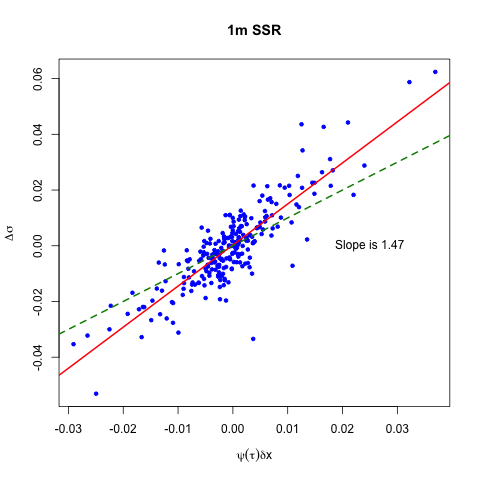

In [22]:
%%R

y <- del.vol[,1]
x <- ret.spx2010*vol.skew.atm[-n,5]
fit.lm1 <- lm(y~x)
print(summary(fit.lm1))

plot(x,y,xlab=expression(psi(tau)*delta*x),ylab=expression(Delta*sigma ),main="1m SSR",pch=20,col="blue")
abline(fit.lm1,col="red",lwd=2)
text(x=0.025,y=-0.0,"Slope is 1.47")
abline(coef=c(0,1),lty=2,lwd=2,col="green4")

Figure 13: The 1-month skew-stickiness ratio (SSR).  The "sticky strike" green line with slope 1 clearly doesn't fit.

### 3-month SSR


Call:
lm(formula = y ~ x)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0180521 -0.0023352 -0.0000552  0.0024244  0.0106338 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0001939  0.0002445   0.793    0.428    
x           1.4509581  0.0432965  33.512   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.003876 on 251 degrees of freedom
Multiple R-squared:  0.8173,	Adjusted R-squared:  0.8166 
F-statistic:  1123 on 1 and 251 DF,  p-value: < 2.2e-16



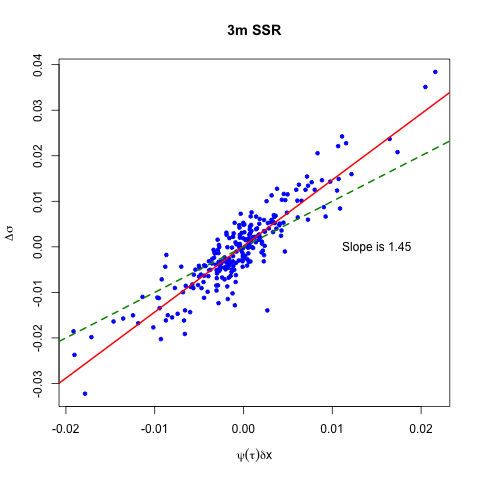

In [23]:
%%R

y <- del.vol[,2]
x <- ret.spx2010*vol.skew.atm[-n,6]
fit.lm3 <- lm(y~x)
print(summary(fit.lm3))

plot(x,y,xlab=expression(psi(tau)*delta*x),ylab=expression(Delta*sigma ),main="3m SSR",pch=20,col="blue")
abline(fit.lm3,col="red",lwd=2)
text(x=0.015,y=-0.0,"Slope is 1.45")
abline(coef=c(0,1),lty=2,lwd=2,col="green4")

Figure 14: The 3-month skew-stickiness ratio (SSR).  The "sticky strike" green line with slope 1 clearly doesn't fit.

### 6-month SSR


Call:
lm(formula = y ~ x)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0176677 -0.0017325 -0.0000075  0.0016376  0.0089884 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.003e-05  1.894e-04   0.423    0.673    
x           1.512e+00  4.522e-02  33.436   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.003004 on 251 degrees of freedom
Multiple R-squared:  0.8166,	Adjusted R-squared:  0.8159 
F-statistic:  1118 on 1 and 251 DF,  p-value: < 2.2e-16



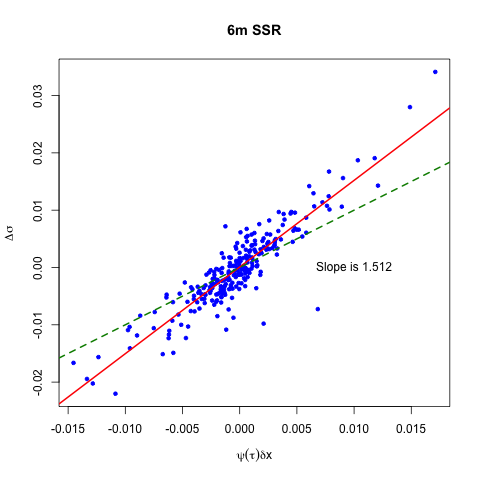

In [24]:
%%R

y <- del.vol[,3]
x <- ret.spx2010*vol.skew.atm[-n,7]
fit.lm6 <- lm(y~x)
print(summary(fit.lm6))

plot(x,y,xlab=expression(psi(tau)*delta*x),ylab=expression(Delta*sigma ),main="6m SSR",pch=20,col="blue")
abline(fit.lm6,col="red",lwd=2)
text(x=0.01,y=-0.0,"Slope is 1.512")
abline(coef=c(0,1),lty=2,lwd=2,col="green4")

Figure 15: The 6-month skew-stickiness ratio (SSR).  The "sticky strike" green line with slope 1 clearly doesn't fit.

### 12-month SSR


Call:
lm(formula = y ~ x)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.007310 -0.001219  0.000014  0.001259  0.008139 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.517e-05  1.401e-04   0.465    0.642    
x           1.601e+00  4.407e-02  36.343   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.002221 on 251 degrees of freedom
Multiple R-squared:  0.8403,	Adjusted R-squared:  0.8397 
F-statistic:  1321 on 1 and 251 DF,  p-value: < 2.2e-16



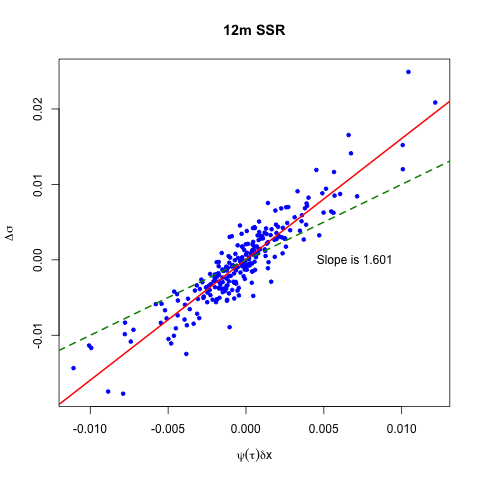

In [25]:
%%R

y <- del.vol[,4]
x <- ret.spx2010*vol.skew.atm[-n,8]
fit.lm12 <- lm(y~x)
print(summary(fit.lm12))

plot(x,y,xlab=expression(psi(tau)*delta*x),ylab=expression(Delta*sigma ),main="12m SSR",pch=20,col="blue")
abline(fit.lm12,col="red",lwd=2)
text(x=0.007,y=0.0,"Slope is 1.601")
abline(coef=c(0,1),lty=2,lwd=2,col="green4")

Figure 16: The 12-month skew-stickiness ratio (SSR).  The "sticky strike" green line with slope 1 clearly doesn't fit.

### Computation of the regression coefficient $\beta(T) = \ee{\delta \sigma(T) | \delta S/S}$

We approximate ATM volatility using the variance swap.
- By definition this is
    $$
    \mathcal{V}_t(T) = \int_t^T\,\xi_t(u)\,du.
    $$

Then
$$
2\,\sigma(T)\,\delta \sigma(T) \,T \approx \int_t^T\,\delta\xi_t(u)\,du.
$$ 

Thus
$$
\beas
\beta(T) &=& \ee{\delta \sigma(T) | \delta S/S}\\
&\approx & \frac{1}{2\,\sigma(T)\,T}\,\int_t^T\,\ee{\delta\xi_t(u)\left|\frac{\delta S}S\right.}\,du.
\eeas
$$

Also,
$$
\ee{\delta\xi_t(u)\left|\frac{\delta S}S\right.} \approx \frac{\ee{\delta\xi_t(u)\,\delta x_t}}{\ee{{\delta x_t}^2}} = \frac{\rho(t,u)}{v_t}
$$

with $x_t = \log S_t$ and

$$
\rho(t,u) = \frac{\ee{d\xi_t(u)\,d x_t}}{dt}.
$$
 

### $\beta(T)$ and $C^{x \xi}$

Then, restoring explicit dependence on $t$ and $T$,

$$
\beas
C^{x\,\xi}_t(T) &=& \int_t^T\,ds\,\int_s^T\,\rho(s,u)\,du\\
%&=& \int_t^T\,\ee{dx_s\,\int_s^T\,d\xi_s(u)\,du}\\
\eeas
$$

and

$$
\beas
\beta(T) 
&\approx & \frac{1}{2\,\sigma(T)\,T}\,\frac 1{v_t}\,\int_t^T\,\rho(t,u) \,du\\
&\approx& -\frac{1}{2\,\sigma(T)\,T}\,\frac{1}{v_t}\,\frac{\partial C^{x\,\xi}_t(T)}{\partial t}.
\eeas
$$

Assuming time-homogeneity, $C^{x \xi}$ would be a function of $\tau=T-t$ only and $v_t \approx \sigma^2$ and so we further approximate

$$
\beta(\tau)  \approx \frac{1}{2\,\sigma^3\,\tau}\frac{\partial C^{x\,\xi}(\tau)}{\partial \tau}.
$$

Also, from the Bergomi-Guyon expansion, the ATM skew is given by

$$
\psi(\tau) \approx   \sqrt{\frac w T} \,\frac{1}{2\,w^2}\,C^{x\,\xi}_t(T) \approx  \frac{1}{2\,\sigma^3}\,\frac{1}{\tau^2}\,C^{x\,\xi}(\tau).
$$ 

Thus 

$$
\mathcal{R}(\tau) = \frac{\beta(\tau)}{\psi(\tau)} \approx \tau\,\frac{d}{d\tau} \log C^{x \xi}(\tau).
$$

For emphasis, to first order in the volatility of volatility, the SSR $\mathcal{R}$ is given by the time derivative of the spot-volatility correlation functional $C^{x \xi}$.

### SSR examples
</p>
####The SABR model

In the SABR model, $
C^{x \xi}(\tau) \propto \tau^2
$ so $ \mathcal{R}(\tau) \approx 2$.

</p>

####The Heston model
$$
C^{x \xi}(\tau) = \rho\,\eta\,\bar v\,\int_0^\tau\,dt\,\int_t^\tau\,e^{-\kappa\,(u-t)}\,du
$$

- For $\tau \ll 1/\kappa$, $C^{x \xi}(\tau) \sim \tau^2$ and $ \mathcal{R}(\tau) \approx 2$.
- For $\tau \gg 1/\kappa$, $C^{x \xi}(\tau) \sim \tau$ and $ \mathcal{R}(\tau) \approx 1$.

#### The $n$-factor Bergomi model

Let $\kappa_1$ be the shortest timescale (largest) mean reversion coefficient and $\kappa_n$ be the longest timescale (smallest) mean reversion coefficient.

- For $\tau \ll 1/\kappa_1$, $C^{x \xi}(\tau) \sim \tau^2$ and $ \mathcal{R}(\tau) \approx 2$.
- For $\tau \gg 1/\kappa_n$, $C^{x \xi}(\tau) \sim \tau$ and $ \mathcal{R}(\tau) \approx 1$.

For stochastic volatility models in general, $\mathcal{R}(\tau) \approx 2$ for $\tau$ small and $\mathcal{R}(\tau) \approx 1$ for $\tau$ large.

### Implication for the "true" model

Empirically, we see $\mathcal{R}(\tau) \sim \frac{3}{2}$ for all $\tau$.  That is

$$
\mathcal{R}(\tau)  \approx \tau\,\frac{d}{d\tau} \log C^{x \xi}(\tau) \approx 2-\gamma.
$$

with $\gamma \approx 1/2$.  Thus $
C^{x \xi}(\tau) \sim \tau^{2-\gamma}
$, and so $\rho(t,u) \sim (u-t)^{-\gamma}$.

An obvious model that would generate $\rho(t,u) \sim (u-t)^{-\gamma}$ is

$$
\frac{d\xi_t(u)}{\xi_t(u)} \propto \frac{dW_t}{(u-t)^\gamma}.
$$

- In effect, replace all the exponential kernels in the Bergomi model [(3)](#eq:dataDriven) with a power-law kernel.


- Such a model would be non-Markovian.  The price of an option would depend on the entire history $\left\{W_s,\,s<t\right\}$ of the Brownian motion.


- To be consistent with $\mathcal{R}(\tau) \sim \frac{3}{2}$, we would need $\gamma \approx \frac 12$.

In Session 6, we will see that scaling properties of the time series of realized variance also suggest such a model.

### Observed term structure of ATM volatility skew

We study a period of history over which the ATM skew was relatively stable.

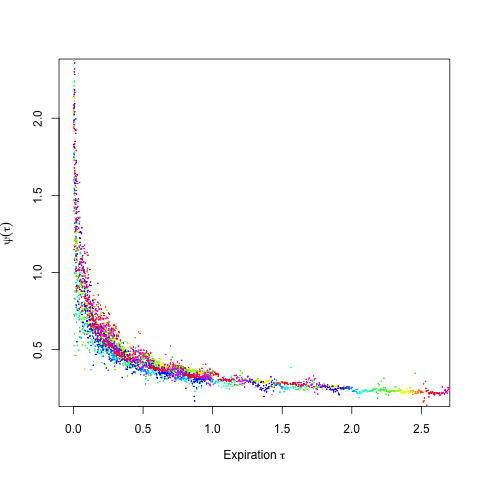

In [26]:
%%R

vsl <- volSkewList2010
n <- length(names(vsl))

mycol <- rainbow(n)

plot(vsl[[1]]$texp,abs(vsl[[1]]$atmSkew),col=mycol[1],pch=20,cex=0.1,xlim=c(0,2.6),
     xlab=expression(paste("Expiration ",tau)),ylab=expression(psi(tau)))
for (i in 2:n){
    points(vsl[[i]]$texp,abs(vsl[[i]]$atmSkew),col=mycol[i],pch=20,cex=0.1)
}

Figure 17: Decay of ATM skew (red dots) with respect to time to expiration.  Data is SPX from 01-Jun-2010 to 01-Jun-2011.

### A shorter even more stable period

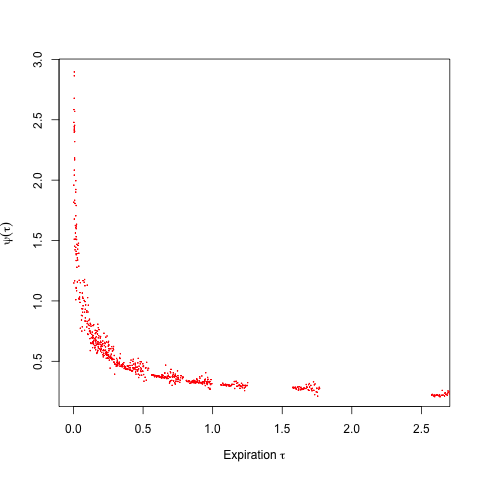

In [27]:
%%R

vsl <- volSkewList2010[201:250]

n <- length(names(vsl))

plot(vsl[[1]]$texp,abs(vsl[[1]]$atmSkew),col="red",pch=20,cex=0.1,xlim=c(0,2.6),
     xlab=expression(paste("Expiration ",tau)),ylab=expression(psi(tau)))
for (i in 2:n){
    points(vsl[[i]]$texp,abs(vsl[[i]]$atmSkew),col="red",pch=20,cex=0.1)
}


Figure 18: Decay of ATM skew (red dots) with respect to time to expiration.  Data is SPX from 16-Mar-2011 to 25-May-2011.

### Log-log plot of empirical ATM skew


Call:
lm(formula = lvsl.atmSkew[pick] ~ lvsl.texp[pick])

Coefficients:
    (Intercept)  lvsl.texp[pick]  
        -1.1332          -0.3983  



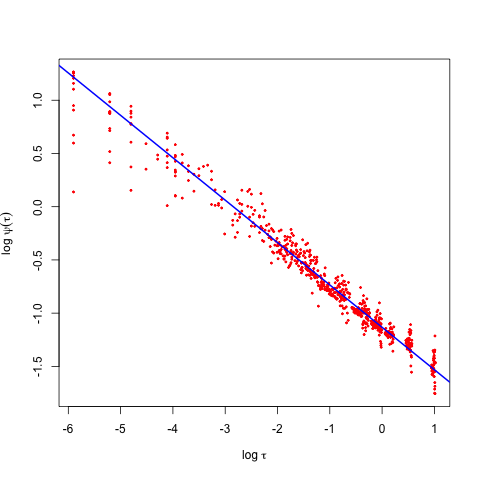

In [28]:
%%R

lvsl.texp <- log(vsl[[1]]$texp)
lvsl.atmSkew <- log(abs(vsl[[1]]$atmSkew))

for (i in 2:n){
    lvsl.texp <- c(lvsl.texp,log(vsl[[i]]$texp))
    lvsl.atmSkew <- c(lvsl.atmSkew,log(abs(vsl[[i]]$atmSkew)))  
}

plot(lvsl.texp,lvsl.atmSkew,col="red",pch=20,cex=0.5,
     xlab=expression(paste("log ",tau)),ylab=expression(paste("log ", psi(tau))))

pick <- (lvsl.texp > -3)

print(fit.lm <- lm(lvsl.atmSkew[pick] ~ lvsl.texp[pick]))
abline(fit.lm,col="blue",lwd=2)

Figure 19: Log-log plot of decay of ATM skew (red dots) with respect to time to expiration.  

### Plot of ATM skew with power-law fit

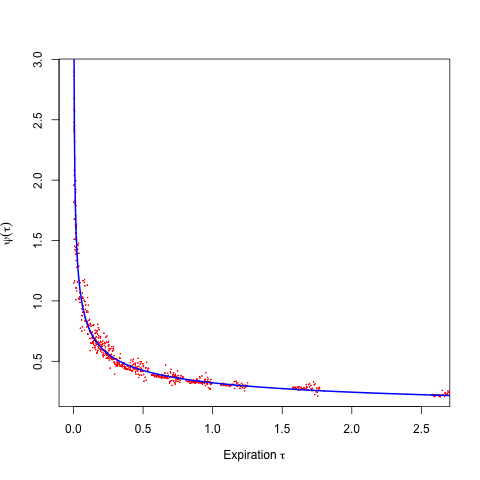

In [29]:
%%R

plot(vsl[[1]]$texp,abs(vsl[[1]]$atmSkew),col="red",pch=20,cex=0.1,xlim=c(0,2.6),
     xlab=expression(paste("Expiration ",tau)),ylab=expression(psi(tau)))
for (i in 2:n){
    points(vsl[[i]]$texp,abs(vsl[[i]]$atmSkew),col="red",pch=20,cex=0.1)
}

a <- fit.lm$coef[1]; b <- fit.lm$coef[2]
curve(exp(a+b*log(x)),from=0,to=3,col="blue",add=T,n=1000,lwd=2)

Figure 20: Log-log plot of decay of ATM skew (red dots) with respect to time to expiration.  Power-law fit $\psi(\tau) \sim \tau ^{-.3983}$ in blue.  Data is SPX from 16-Mar-2011 to 25-May-2011.

###The variance swap curve

Assuming the underlying diffuses, the fair value $\cV_t(T)$ of a variance swap with maturity $T$ may be computed as follows:

$$
\cV_t(T) = \int_t^T\,\xi_t(u)\,du = \int_0^\infty\,\min[P(K,T),C(K,T)]\,\frac{dK}{K^2}
$$

where $C(K,T)$ and $P(K,T)$ denote the prices of calls and puts with strike $K$ and expiration $T$ respectively.  For details, see for example <span>[The Volatility Surface]<sup id="cite_ref-TVS" class="reference"><a href="#cite_note-TVS"><span>[</span>5<span>]</span></a></sup>.  We will visit this again in Session 5.

Thus, with this continuity assumption, we may compute the fair value of a variance swap from an infinite strip of call and put option prices (the so-called log-strip).  


- For a given maturity, the variance swap level depends on exactly how we interpolate and extrapolate option prices.


- We use the *arbitrage-free SVI parameterization* that I will explain in Session 3.


-  In particular, we will analyze variance swap estimates from June 01, 2010 to June 10, 2011, the same period as before.

In [30]:
%%R

load("spxVarSwapList2010.rData")

n <- length(names(varSwapList2010))

# Convert list to matrix
tmp <- array(dim=c(n,40))

for (i in 1:n){
    tmp[i,] <- varSwapList2010[[i]]$varSwap
}

varswap.mean <- apply(tmp,2,mean)
varswap.sd <- apply(tmp,2,sd)
tmat <- (1:40)*.05

### The average shape of the variance swap curve

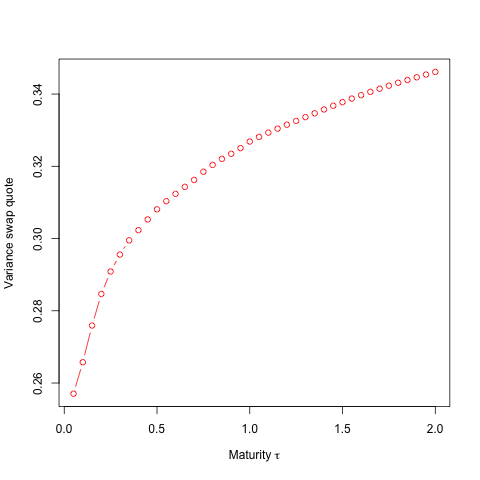

In [31]:
%%R

plot(tmat,sqrt(varswap.mean),type="b",col="red",xlab=expression(paste("Maturity ",tau)),ylab="Variance swap quote")

Figure 21: Average shape of the variance swap curve from  01-Jun-2010 to 01-Jun-2011.

### The volatility envelope

The *envelope* is the graph of volatilities of variance swap quotes vs time to maturity.  First, we draw a log-log plot of standard deviation of log-differences of the curves. 




Call:
lm(formula = y[1:20] ~ x[1:20])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.046099 -0.015713  0.004174  0.014588  0.048747 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.885944   0.008890  -324.6   <2e-16 ***
x[1:20]     -0.365137   0.007513   -48.6   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02662 on 18 degrees of freedom
Multiple R-squared:  0.9924,	Adjusted R-squared:  0.992 
F-statistic:  2362 on 1 and 18 DF,  p-value: < 2.2e-16



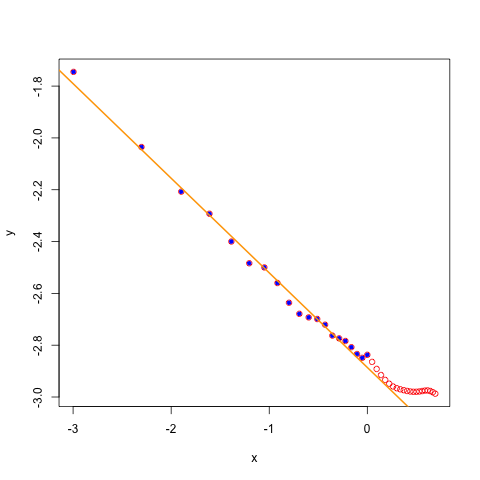

In [32]:
%%R

# Compute standard deviation of log-differences
sd.t <- function(x){sd(diff(log(x)))}

varswap.sd.t <- apply(tmp,2,sd.t)

# Log-log plot
x <- log(tmat)
y <- log(varswap.sd.t)
plot(x,y,col="red")
points(x[1:20],y[1:20],col="blue",pch=20)

fit.lm2 <- lm(y[1:20]~x[1:20])
print(summary(fit.lm2))
abline(fit.lm2,col="orange",lwd=2)
a2 <- fit.lm2$coef[1]; b2 <- fit.lm2$coef[2]

Figure 22: Log-log plot of volatility envelope with linear fit.

### Variance swap envelope with power-law fit

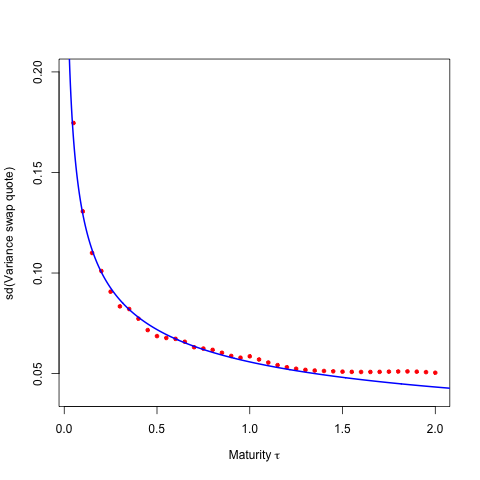

In [33]:
%%R

plot(tmat,varswap.sd.t,col="red",pch=20,xlab=expression(paste("Maturity ",tau)),ylab="sd(Variance swap quote)",ylim=c(0.04,.2))
curve(exp(a2+b2*log(x)),from=0,to=3,col="blue",add=T,n=1000,lwd=2)

Figure 23: Variance swap envelope from  01-Jun-2010 to 01-Jun-2011.  The blue line corresponds to the fit $\tau^{-0.365}$.

### Hand-waving computation

Consider once again a model of the form

$$
\frac{d\xi_t(u)}{\xi_t(u)} \propto \frac{dW_t}{(u-t)^\gamma}.
$$

Then

$$
d\cV_t(T) = \int_t^T\,d\xi_t(u)\,du \sim \int_t^T\,\xi_t(u)\,\frac{dW_t}{(u-t)^\gamma}\,du.
$$


Then

$$
\ee{d\cV_t(T)^2} \sim \left( \int_t^T\,\xi_t(u)\,\frac{1}{(u-t)^\gamma}\,du. \right)^2\,dt 
\sim \cV_t(T)^2\, (T-t)^{2 -2\,\gamma}.
$$

The standard deviation of log-differences computed above should then scale as  

$$
\left(\frac{1}{\tau^2}\,\tau^{2 -2\,\gamma}\right)^{1/2} = \frac{1}{\tau^\gamma}.
$$

- the same scaling as that of the ATM volatility skew

- a relationship also confirmed in the data.

###Moral of the story

Conventional stochastic volatility models are *normative*.

- We write down underlying dynamics as if to say ``suppose the underlying stochastic drivers were to satisfy the following...''.

- Dynamics are invariably Markovian, in contrast to the real world.

- The state space is typically very small.

<blockquote>
<div style="background-color:#E8E8E8; color:#000000; font-style: normal; ">


Conventional models of volatility are 
engineering models, not physics models.


</div>

</blockquote>

 - Conventional stochastic volatility models are Markovian approximations to a non-Markovian reality.



### Motivating observation

A Bergomi model with dynamics of the form

$$
\frac{d\xi_t(u)}{\xi_t(u)} \propto \frac{dW_t}{(u-t)^\gamma}
$$

might be consistent with our empirical observations.

## References  

<br />

<div class="reflist" style="list-style-type: decimal;">

<ol>

<li id="cite_note-Bergomi2"><span class="mw-cite-backlink"><b><a href="#cite_ref-Bergomi2">^</a></b></span>   Lorenzo Bergomi, Smile dynamics II, *Risk Magazine* 67-73 (October 2005).</li>

<li id="cite_note-Bergomi4"><span class="mw-cite-backlink"><b><a href="#cite_ref-Bergomi4">^</a></b></span>   Lorenzo Bergomi, Smile dynamics IV, *Risk Magazine* 94-100 (December 2009).</li>
  
<li id="cite_note-BG"><span class="mw-cite-backlink"><b><a href="#cite_ref-BG">^</a></b></span> 
Lorenzo Bergomi and Julien Guyon, Stochastic volatility’s orderly smiles. *Risk Magazine* 60-66, (May 2012).</li>
 
<li id="cite_note-Cont2001"><span class="mw-cite-backlink"><b><a href="#cite_ref-Cont2001">^</a></b></span> Rama Cont,  Empirical properties of asset returns: stylized facts and statistical issues, *Quantitative Finance* **1** 223-236 (2001).</li>
 
<li id="cite_note-TVS"><span class="mw-cite-backlink"><b><a href="#cite_ref-TVS">^</a></b></span>     Jim Gatheral, <span>*The Volatility Surface: A Practitioner’s
Guide*</span>, John Wiley and Sons, Hoboken, NJ (2006).</li> 
 
<li id="cite_note-GO"><span class="mw-cite-backlink"><b><a href="#cite_ref-GO">^</a></b></span> Jim Gatheral and Roel Oomen, Zero-intelligence realized variance estimation, *Finance and Stochastics* **14**(2) 249-283 (2010).</li> 
 
 <li id="cite_note-Kamal"><span class="mw-cite-backlink"><b><a href="#cite_ref-Kamal">^</a></b></span> Michael Kamal and Jim Gatheral, Implied Volatility Surface, *Encyclopedia of Quantitative Finance*, Wiley (2010). </li>
 

  
</ol>

